# Final Project of Introduction to Bioinformatics

## Comparative Mitochondrial Genomics and Phylogenetic Analysis



This task focuses on the comparative analysis of mitochondrial genomes from different species, primarily birds, mammals, and insects. The aim is to understand the evolutionary relationships between these species by analyzing and comparing their mitochondrial DNA, which is about 16,000 base pairs in length. You will use advanced computational methods to construct phylogenetic trees and delve into the ecological and anthropological insights that can be gleaned from this data. This project is designed to provide a comprehensive understanding of mitochondrial genomics, its importance in evolutionary biology, and its applications in broader scientific contexts.

You will learn:

- Techniques for aligning and comparing mitochondrial DNA sequences.
- How to construct and interpret phylogenetic trees using advanced computational methods.
- The application of mitochondrial genomics in understanding ecological interactions and human evolutionary history.

#### Task Roadmap

1. **Mitochondrial Genome Comparison**:
   - Align mitochondrial DNA sequences from the provided dataset.
   - Analyze these sequences to identify similarities and differences across species.

2. **Phylogenetic Analysis Using Advanced Methods**:
   - Apply Maximum Likelihood (ML) and Bayesian Inference methods, utilizing tools like `ETE Toolkit`, `DendroPy`, `BEAST`, or `PyRate`.
   - Compare the trees generated by these methods to understand how different approaches can lead to different interpretations of the data.

3. **Cross-Disciplinary Applications (Bonus)**:
   - **Ecology**: Examine how mitochondrial DNA analysis can reveal information about species adaptation, migration, and conservation. This involves understanding how genetic variation within and between species can inform ecological strategies and conservation efforts.
   - **Anthropology**: Investigate the use of mitochondrial DNA in tracing human evolution and migration patterns. This includes studying the mitochondrial DNA of mammals in your dataset to draw parallels with human evolutionary studies.

### Data Sources

The mitochondrial DNA data for birds, mammals, and insects will be provided to you. This dataset has been curated to facilitate a comprehensive comparative analysis and is essential for the completion of your phylogenetic studies.

### Useful Resources and Material

- [Mitochondrial DNA - Wikipedia](https://en.wikipedia.org/wiki/Mitochondrial_DNA): A general introduction to the structure, function, origin, and diversity of mitochondrial DNA, as well as its applications in various fields such as medicine, forensics, and anthropology.
- [Mitochondrial DNA Analysis: Introduction, Methods, and Applications](https://bioinfo.cd-genomics.com/mitochondrial-dna-analysis-introduction-methods-and-applications.html): An explanation of the basics of mitochondrial DNA sequencing, bioinformatics analysis, heteroplasmy, and advantages of mitochondrial DNA analysis over nuclear DNA analysis.
- [Phylogenetic Tree- Definition, Types, Steps, Methods, Uses - Microbe Notes](https://microbenotes.com/phylogenetic-tree/): A coverage of the concepts and methods of phylogenetic tree construction, including the types of phylogenetic trees, the steps involved in phylogenetic analysis, the main methods of phylogenetic inference, and the applications of phylogenetic trees in various disciplines.
- [Phylogenetics - Wikipedia](https://en.wikipedia.org/wiki/Phylogenetics): An overview of the field of phylogenetics, which is the study of the evolutionary history and relationships among or within groups of organisms. It also discusses the data sources, models, algorithms, software, and challenges of phylogenetic analysis.
- [ETE Toolkit](http://etetoolkit.org/): A Python library for manipulating, analyzing, and visualizing phylogenetic trees. It supports various formats, methods, and tools for phylogenetic analysis, such as alignment, tree inference, tree comparison, tree annotation, and tree visualization.
- [DendroPy](https://dendropy.org/): Another Python library for phylogenetic computing. It provides a comprehensive API for working with phylogenetic data structures, such as trees, characters, and networks. It also offers a rich set of functions for simulation, manipulation, analysis, and annotation of phylogenetic data.

### Exploration and Reflection

As we proceed with our analysis of mitochondrial DNA for phylogenetic tree construction, it is valuable to contemplate a few questions. These inquiries aim to facilitate a more thorough understanding of the roles and characteristics of mitochondrial DNA in the context of evolutionary biology:

1. **Maternal Inheritance and Its Implications**: How does the maternal inheritance of mitochondrial DNA simplify our understanding of evolutionary lineage compared to nuclear DNA, which undergoes recombination? What unique insights can this aspect provide in tracing the evolutionary history of species?

2. **Mutation Rate and Evolutionary Insights**: Mitochondrial DNA mutates at a faster rate than nuclear DNA. How does this characteristic make mtDNA a more sensitive tool for detecting recent evolutionary events and relationships among closely related species? Can you think of any specific scenarios or studies where this property of mtDNA has been particularly instrumental?

Reflect on these questions as you work through the project, and consider how the properties of mitochondrial DNA enhance its value and applicability in evolutionary biology and beyond. Provide your answer either in this notebook, or in your report (if you had one).

<blockquote style="font-family:Arial; color:red; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>Don't forget to answer these questions!</strong>
</blockquote>

### Step 0: Installing Necessary Packages

In [4]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.1 MB/s eta 0:00:00


In [5]:
import sys
import subprocess
import pkg_resources

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

REQUIRED_PACKAGES = [
    'biopython',
    'pandas',
    'numpy'
]

for package in REQUIRED_PACKAGES:
    try:
        dist = pkg_resources.get_distribution(package)
        print('{} ({}) is installed'.format(dist.key, dist.version))
    except pkg_resources.DistributionNotFound:
        print('{} is NOT installed'.format(package))
        install(package)
        print('{} was successfully installed.'.format(package))

biopython (1.83) is installed
pandas (1.5.3) is installed
numpy (1.23.5) is installed


In [6]:
!apt-get install mafft

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-lato libauthen-sasl-perl libclone-perl libdata-dump-perl libencode-locale-perl
  libfile-listing-perl libfont-afm-perl libhtml-form-perl libhtml-format-perl libhtml-parser-perl
  libhtml-tagset-perl libhtml-tree-perl libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-message-perl libhttp-negotiate-perl libio-html-perl libio-socket-ssl-perl
  liblwp-mediatypes-perl liblwp-protocol-https-perl libmailtools-perl libnet-http-perl
  libnet-smtp-ssl-perl libnet-ssleay-perl libruby3.0 libtry-tiny-perl liburi-perl libwww-perl
  libwww-robotrules-perl lynx lynx-common mailcap mime-support netbase perl-openssl-defaults rake
  ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration
Suggested packages:
  libdigest-hmac-perl libgssapi-perl libcrypt-ssleay-perl libsub-name-perl libbusiness-isbn-

In [7]:
#Installing MAFFT using apt-get in quiet mode
!apt-get install -qq -y mafft

In [8]:
#Checking that MAFFT was succesfully installed
!mafft --help

------------------------------------------------------------------------------
  MAFFT v7.490 (2021/Oct/30)
  https://mafft.cbrc.jp/alignment/software/
  MBE 30:772-780 (2013), NAR 30:3059-3066 (2002)
------------------------------------------------------------------------------
High speed:
  % mafft in > out
  % mafft --retree 1 in > out (fast)

High accuracy (for <~200 sequences x <~2,000 aa/nt):
  % mafft --maxiterate 1000 --localpair  in > out (% linsi in > out is also ok)
  % mafft --maxiterate 1000 --genafpair  in > out (% einsi in > out)
  % mafft --maxiterate 1000 --globalpair in > out (% ginsi in > out)

If unsure which option to use:
  % mafft --auto in > out

--op # :         Gap opening penalty, default: 1.53
--ep # :         Offset (works like gap extension penalty), default: 0.0
--maxiterate # : Maximum number of iterative refinement, default: 0
--clustalout :   Output: clustal format, default: fasta
--reorder :      Outorder: aligned, default: input order
--quiet :      

In [9]:
!pip install -q condacolab

In [10]:
import condacolab
condacolab.install_miniconda()
!conda install -c bioconda raxml-ng modeltest-ng --yes

⏬ Downloading https://repo.anaconda.com/miniconda/Miniconda3-py310_23.3.1-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:24
🔁 Restarting kernel...
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [1]:
!apt-get install mrbayes

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libclang-common-15-dev libclang-cpp15 libclc-15 libclc-15-dev libhmsbeagle1v5 libllvmspirvlib15
  mesa-opencl-icd
Suggested packages:
  mrbayes-doc
The following NEW packages will be installed:
  libclang-common-15-dev libclang-cpp15 libclc-15 libclc-15-dev libhmsbeagle1v5 libllvmspirvlib15
  mesa-opencl-icd mrbayes
0 upgraded, 8 newly installed, 0 to remove and 32 not upgraded.
Need to get 41.7 MB of archives.
After this operation, 289 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libclang-common-15-dev amd64 1:15.0.7-0ubuntu0.22.04.3 [5,988 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libclang-cpp15 amd64 1:15.0.7-0ubuntu0.22.04.3 [12.6 MB]
Get:3 http://arc

In [2]:
# Import necessary libraries.
import pandas as pd
import numpy as np

### Step 1: Dataset Expansion

Our first task is to augment our dataset with additional species. This involves engaging with the NCBI database to retrieve mitochondrial DNA sequences.

#### Instructions:

- **Species Selection**: Identify and choose 10 additional species to include in your dataset. Aim for a diverse selection to enrich your phylogenetic analysis.

- **Querying NCBI Database**: Use the NCBI database to locate mitochondrial DNA sequences for your chosen species. While you can manually search on the [NCBI website](https://www.ncbi.nlm.nih.gov/), consider automating this process through their API for a more efficient approach.
    - **Example Query**: As a starting point, you might use a query like `"mitochondrion[Filter] AND (your_species_name[Organism])` to find specific mtDNA sequences. Adjust the query parameters according to your species selection.
    - **Documentation**: Familiarize yourself with the [NCBI API documentation](https://www.ncbi.nlm.nih.gov/books/NBK25497/) for detailed guidance on constructing queries.

- **Using NCBI Website**: You are welcome to use the NCBI website for this task. If you do so, document each step of your process clearly in your task report. This should include the species names, search terms used, and how you determined the relevant sequences to include.

- **Bonus Opportunity**: Implementing an automated, methodological approach using the NCBI API and relevant Python packages to add all 10 records in your dataset will earn you a 50% bonus for this section. Your method should be structured and replicable, demonstrating a systematic approach to data collection.

Remember, the goal is to methodically expand your dataset with relevant mtDNA sequences, paving the way for insightful phylogenetic analysis.

In [3]:
from Bio import Entrez

Entrez.email = 'mmowlavi2002@gmail.com'
Entrez.api_key = '340f39e36c0949d068681a5823d350ea4a08'

In [33]:
def get_taxo_id_number(species_name):
    handle = Entrez.esearch(db="taxonomy", term=species_name)
    record = Entrez.read(handle)

    if "IdList" in record and record["IdList"]:
        return record["IdList"][0]
    else:
        print(f"No records found for {species_name}")
        return None

species_name = "Eudynamys scolopaceus"
get_taxo_id_number(species_name)

'8945'

In [35]:
from Bio import Entrez

def get_accession_number(species_name):
    search_handle = Entrez.esearch(db="nuccore", term=f"{species_name} mitochondrial genome" , retmode="xml")
    search_results = Entrez.read(search_handle)
    search_handle.close()

    if "IdList" in search_results and search_results["IdList"]:
        first_id = search_results["IdList"][0]
        fetch_handle = Entrez.efetch(db="nuccore", id=first_id, rettype="gb", retmode="text")
        record = fetch_handle.read()
        fetch_handle.close()
        accession_number = record.split("ACCESSION")[1].split()[0]
        return accession_number
    else:
        print(f"No records found for {species_name}")
        return None

species_name = "Eudynamys scolopaceus"
accession_number = get_accession_number(species_name)

if accession_number:
    print(f"The accession number for {species_name} is: {accession_number}")


The accession number for Eudynamys scolopaceus is: NC_060520


In [27]:
def get_common_name(taxo_id):
    taxonomy_handle = Entrez.efetch(db="taxonomy", id=taxo_id, retmode="xml")
    taxonomy_record = Entrez.read(taxonomy_handle)[0]
    scientific_name = taxonomy_record["ScientificName"]
    genbank_common_name = taxonomy_record.get("OtherNames", {}).get("GenbankCommonName", "N/A")
    return genbank_common_name

taxo_id = "6669"
print(get_common_name(taxo_id))

common water flea


In [28]:
def get_link(accession_number):
    return f"https://www.ncbi.nlm.nih.gov/nuccore/{accession_number}"

get_link('OR102666')

'https://www.ncbi.nlm.nih.gov/nuccore/OR102666'

In [83]:
dataset = pd.read_csv('species.csv')
dataset.head()

,taxo_id,specie,blast_name,genbank_common_name,accession_number,mtDNA,Unnamed: 6
0,8945,Eudynamys scolopaceus,birds,Asian koel,NC_060520,https://www.ncbi.nlm.nih.gov/nucleotide/NC_060...,?????
1,7460,Apis mellifera,Bees,honey bee,NC_051932,https://www.ncbi.nlm.nih.gov/nucleotide/NC_051...,????
2,36300,Pelecanus crispus,birds,Dalmatian pelican,OR620163,https://www.ncbi.nlm.nih.gov/nuccore/OR620163.1,??????
3,10116,Rattus norvegicus,Rodents,Norway rat,NC_001665,https://www.ncbi.nlm.nih.gov/nuccore/NC_001665,???
4,9031,Gallus gallus,birds,Gallus gallus,NC_053523,https://www.ncbi.nlm.nih.gov/nuccore/NC_053523.1,????


In [84]:
import time
species_list = {
    "Sphyrnidae": "sharks & rays",
    "Ursus arctos": "carnivores",
    "Panthera leo": "carnivores",
    "Panthera tigris": "carnivores",
    "Acinonyx jubatus": "carnivores",
    "Felis catus": "carnivores",
    "Canis lupus": "carnivores",
    "Ursus maritimus": "carnivores",
    "Rhincodon typus": "sharks & rays",
    "Cetorhinus maximus": "sharks & rays",
}

for species, blast_name in species_list.items():
    query = "mitochondrion"
    taxo_id = get_taxo_id_number(species)

    if taxo_id:
        accession_number = get_accession_number(species)
        link = get_link(accession_number)
        common_name = get_common_name(taxo_id)
        new_row = pd.DataFrame(
        {
          'taxo_id': [taxo_id], 'specie': [species], 'blast_name': [blast_name],
          'genbank_common_name': [common_name], 'accession_number': [accession_number],
          'mtDNA': [link]
        }
                               )
        dataset = pd.concat([dataset, new_row], ignore_index=True)
        # time.sleep(1)

dataset.to_csv('expanded_dataset.csv', index=False)


#### Checking Data Consistency

The code block is designed to check the accuracy of a biological dataset. It examines each entry in a CSV file, focusing on taxonomy IDs, species names, GenBank accession numbers, and mitochondrial DNA links. It uses the NCBI's Entrez system to ensure taxonomy IDs correspond to the correct species and confirms the mitochondrial DNA links are accurate. The script also checks GenBank accession numbers against the provided links. This method is useful for maintaining the accuracy of current data and **might help in adding new entries to the database.**

In [ ]:
import pandas as pd
import requests
from Bio import Entrez
import os
from io import BytesIO
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

def fetch_entrez_record(db, id, rettype, retmode):
    """Fetch record from NCBI Entrez with retries."""
    url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db={db}&id={id}&rettype={rettype}&retmode={retmode}"
    session = requests.Session()
    retries = Retry(total=5, backoff_factor=1, status_forcelist=[502, 503, 504])
    session.mount('https://', HTTPAdapter(max_retries=retries))

    try:
        response = session.get(url)
        response.raise_for_status()
        if db == "nucleotide":
            return response.text
        return response.content
    except requests.exceptions.HTTPError as err:
        print(f"HTTP error: {err}")
    except requests.exceptions.ConnectionError as err:
        print(f"Connection error: {err}")
    return None

def verify_taxonomy_id(taxo_id, species_name):
    """Verify taxonomy ID against species name."""
    xml_data = fetch_entrez_record("taxonomy", taxo_id, "xml", "xml")
    if xml_data:
        # Convert bytes data to a binary file-like object
        xml_data_io = BytesIO(xml_data)
        records = Entrez.read(xml_data_io)
        x = records[0]['ScientificName'].lower() == species_name.lower()
        if not x:
          print(records[0]['ScientificName'].lower(), species_name.lower())
        return records[0]['ScientificName'].lower() == species_name.lower()

    return False

def verify_mitochondrial_dna(accession_number):
    gb_data = fetch_entrez_record("nucleotide", accession_number, "gb", "text")
    return "mitochondrion" in gb_data.lower() if gb_data else False

def extract_accession_from_link(link):
    return link.split('/')[-1].split('.')[0]

def check_dataset_consistency(file_path):
    species_df = pd.read_csv(file_path)

    for index, row in species_df.iterrows():
        taxonomy_id = str(row['taxo_id'])
        species_name = row['specie']
        accession_number = row['accession_number']
        mtDNA_link = row['mtDNA']
        extracted_accession = extract_accession_from_link(mtDNA_link)

        taxonomy_check = verify_taxonomy_id(taxonomy_id, species_name)
        accession_match = (accession_number == extracted_accession)
        mitochondrial_check = verify_mitochondrial_dna(accession_number)

        print(f"Row {index}: Taxonomy Check: {taxonomy_check}, Accession Match: {accession_match}, Mitochondrial Check: {mitochondrial_check}")


In [ ]:
check_dataset_consistency('expanded_dataset.csv')

### Step 3: Sequence Download and Preparation

The next step in our project involves downloading the mitochondrial DNA sequences for each species and preparing them for analysis.

#### Instructions:

- **Download mtDNA Sequences**: Write a script to download the mtDNA sequences from the links provided in your dataset. The sequences should be in FASTA format, which is the standard for nucleotide sequences.

- **Sequence Labeling**: Properly label each sequence within the FASTA file. This header, starting with '>', should include the species name and any other relevant information (e.g., `>Eudynamys_scolopaceus_NC_060520`). This is crucial for identifying the sequences in subsequent analysis.

- **Concatenate Sequences**:
    - Create a script to concatenate all downloaded sequences into a single `.fasta` or `.fna` file.
    - Ensure each sequence in the file is clearly separated by its header line, which is important for differentiating the sequences of various species.

#### Tips for Writing the Download and Concatenation Script:
- Use Python libraries such as `httpx` or `requests`, or any other tool you prefer for downloading sequences. For processing FASTA files you can use a wide range of tools. One recommended option is `Biopython` library.
- Use a loop to go through each link in the dataset, download the sequence, and append it to your concatenated file.
- Maintain the format integrity of the FASTA file, ensuring each sequence is correctly associated with its header.


In [81]:
# TODO: Write a function to download mtDNA sequences

def download_mtDNA(accession_number):
    handle = Entrez.efetch(db="nuccore", id=accession_number, rettype="fasta")
    fasta_data = handle.read()
    handle.close()
    lines = fasta_data.splitlines()
    fasta_data = '\n'.join(lines[1:])
    return fasta_data


mt_dna = download_mtDNA('NC_060520')
print(mt_dna)

GTCCTCGTAGCTTAAACAAAGCATGACGCTGAAGATGTCAAGATGGCCCACCACATACCCGAGGACAAAA
GACTTAGTCCTAACCTTGCCGTTAGTTTTTGCTAGATATATACATGCAAGTATCCGCACTCCAGTGTAAA
TGCCCTTAACCTCTTACCAAGACAAAAGGGGCAGGCATCAGGCGCGCCCAAAATGTATCGCAGCCCAAGA
CGCCTTGCTCAGCCACACCCACACGGGTATTCAGCAGTAATTAACATTAAGCAATGAGTGTAAACTTGAC
TTAGTCATAGCAACTACCTAGGGCTGGTAAATCTTGTGCCAGCCACCGCGGTCACACAAGAAGCCCGAAT
TAACTGCAACACGGCGTAAAGAGTGGTATGTACATTATCACCCCATCTAGTGTCGAAATGTGACTAAGCT
GTCATAAGCCCAAGCCACACCTAAAACCACCATGAAAATGATTCTAGCAAAATTATGATAAACCAGATCC
ACTAAAGCTAGGACACAAACTGGGATTAGATACCCCTCTATGCCTAGCCCTAAATCTTGGTACTTAACCT
TACTGAAGTATCCGCCCGAGAACTACGAGCACAAACGCTTAAAACTCTAAGGACTTGGCGGTGCCCCAAA
CCCCCCTAGAGGAGCCTGTTCTATAATCGATAACCCACGCTACACCCGACCATCTCTAGCCTAAGCAGCC
TATATACCGCCGTCGCCAGCCCACCTCCATTGAAAGAACAGCAGTGAGCACAATAGCACTACACTAATAA
GACAGGTCAAGGTATAGCTTATGGGATGGAAGAAATGGGCTACATTTTCTAGCAGTAGAAAACACGGACA
GAGGTATGAAACTACCTCTAAAAGGCGGATTTAGTAGTAAAGAAGGACAATAAAGCTTTCTTTAAATTGG
CCCTGGGGTACGTACATACCGCCCGTCACCCTCCTCACAAGCTCCAAATTATATAACTAATACCCCTACA
AGCTAA

In [85]:
# TODO: Loop through the dataset and download each mtDNA sequence
fasta_data = ""
for index, row in dataset.iterrows():
    mt_dna = download_mtDNA(row['accession_number'])
    if not mt_dna:
        print(f"dna not found for the row['specie']")
        continue
    fasta_data += '>' + row['specie'].replace(' ', '_') + '_' + row['accession_number'] + '\n'
    fasta_data += mt_dna
    print(len(mt_dna), row['specie'])

with open('data.fasta', 'w') as f:
    f.write(fasta_data)


18430 Eudynamys scolopaceus
16680 Apis mellifera
7068 Pelecanus crispus
16547 Rattus norvegicus
17024 Gallus gallus
17282 Myotis lucifugus
16108 Tribolium castaneum
16979 Anser cygnoides
16854 Ovis aries
22782 Tyto alba
19803 Drosophila melanogaster
16933 Apteryx australis
17594 Spheniscus demersus
17159 Corvus brachyrhynchos
16532 Mus musculus
16950 Dromaius novaehollandiae
16842 Anas platyrhynchos
16791 Pteropus vampyrus
16833 Struthio camelus
18714 Aquila nipalensis
16963 Cygnus cygnus
17094 Taeniopygia guttata
17549 Aptenodytes forsteri
16966 Sphyrnidae
1633 Ursus arctos
16865 Panthera leo
13872 Panthera tigris
3017 Acinonyx jubatus
749 Felis catus
13935 Canis lupus
15111 Ursus maritimus
17134 Rhincodon typus
16903 Cetorhinus maximus


### Step 4: Sequence Alignment

After downloading the mitochondrial DNA sequences, the next critical step is their alignment. This process allows us to compare the sequences and discern the evolutionary relationships among the species.

#### Instructions:

- **Select an Alignment Tool**: Choose one of the following alignment tools based on your project needs. Each tool has its strengths and is widely used in bioinformatics for multiple sequence alignment.

1. **MAFFT**:
    - **Brief Introduction**: MAFFT (Multiple Alignment using Fast Fourier Transform) is renowned for its speed and efficiency, particularly suitable for large datasets.
    - **Resources**:
        - [MAFFT Official Documentation](https://mafft.cbrc.jp/alignment/software/)
        - [Example Usage on GitHub](https://github.com/MountainMan12/SARS-Cov2-phylo)
        - [Relevant Notebook](https://colab.research.google.com/github/pb3lab/ibm3202/blob/master/tutorials/lab03_phylo.ipynb)

2. **Clustal Omega**:
    - **Brief Introduction**: Clustal Omega offers high-quality alignments and is user-friendly, ideal for those new to sequence alignment.
    - **Resources**:
        - [A Python wrapper around Clustal Omega](https://github.com/benchling/clustalo-python)
        - [Clustal Omega Official Website](http://www.clustal.org/omega/)

3. **MUSCLE**:
    - **Brief Introduction**: MUSCLE (Multiple Sequence Comparison by Log-Expectation) is known for its balance between speed and accuracy, making it a versatile choice for various datasets.
    - **Resources**:
        - [MUSCLE Documentation](https://drive5.com/muscle5/manual/)

- **Perform Sequence Alignment**: Utilize your chosen tool to align the downloaded mtDNA sequences. This alignment is foundational for the accurate construction of phylogenetic trees.

- **Save Aligned Sequences**: After alignment, save the output in an appropriate format for further analysis in the subsequent steps of this project.

The choice of the best alignment tool depends on various factors, including the size of your dataset, the speed of the alignment tool, the accuracy of the alignments, and your specific project goals. Each alignment tool has its strengths and may be more suitable for different scenarios. Here are some considerations for each of the mentioned tools:

MAFFT:

Strengths: Fast and efficient, particularly suitable for large datasets. Performs well with divergent sequences.
Considerations: May sacrifice some accuracy for speed in certain cases.
Clustal Omega:

Strengths: User-friendly with a good balance between speed and accuracy. Ideal for those new to sequence alignment.
Considerations: May be slightly slower than MAFFT but provides high-quality alignments.
MUSCLE:

Strengths: Balanced between speed and accuracy, making it a versatile choice for various datasets.
Considerations: May not be as fast as MAFFT, but it generally provides accurate alignments.
Consider the following factors when choosing an alignment tool:

Dataset Size: For large datasets, MAFFT might be more suitable due to its speed. For smaller datasets, Clustal Omega or MUSCLE can provide accurate alignments without sacrificing too much speed.

Sequence Divergence: If your sequences are highly divergent, MAFFT is known for handling such cases well. It performs efficiently even with considerable differences between sequences.

Ease of Use: If you are new to sequence alignment, Clustal Omega's user-friendly interface might be beneficial. It provides a good balance between performance and ease of use.

Accuracy: If accuracy is crucial for your analysis, both Clustal Omega and MUSCLE are known for producing high-quality alignments.

In [86]:
with open('data.fasta', 'r') as f:
  data = f.read()
  print(len(data))

508615


In [87]:
!which mafft

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/usr/bin/mafft


In [ ]:
# TODO: Install and import the alignment tool
# !pip install mafft
# Import necessary libraries
from Bio.Align.Applications import MafftCommandline

mafft_cline=MafftCommandline(input="data.fasta")
print(mafft_cline)
stdout, stderr = mafft_cline()

with open("aligned.fasta", "w") as handle:
  handle.write(stdout)

/usr/local/lib/python3.10/dist-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


mafft data.fasta


In [ ]:
from Bio import AlignIO
align = AlignIO.read("aligned.fasta", "fasta")

### Step 5: Phylogenetic Tree Construction

The next phase in our project involves constructing phylogenetic trees to visualize and analyze the evolutionary relationships among the species. We will use three distinct methods, each providing unique insights.

#### Phylogenetic Tree Construction Methods:

1. **Bayesian Inference Trees**:
    - **Overview**: This method uses Bayesian statistics to estimate the likelihood of different evolutionary histories. It's particularly useful for its ability to estimate branch lengths and support values.
    - **Tools**: MrBayes, BEAST
        - MrBayes ([Official Website](https://nbisweden.github.io/MrBayes/manual.html/)) is widely recognized for its robustness in Bayesian inference.
        - BEAST2 ([BEAST Software](https://www.beast2.org/)) is another powerful tool, offering advanced features for complex evolutionary models.

2. **Maximum Likelihood Trees**:
    - **Overview**: Maximum Likelihood methods evaluate tree topologies based on the likelihood of observed data given a tree model. It's known for its statistical rigor and accuracy.
    - **Tools**: RAxML, PhyML
        - RAxML ([RAxML GitHub](https://github.com/stamatak/standard-RAxML)) is preferred for large datasets due to its efficiency.
        - PhyML ([PhyML Documentation](http://www.atgc-montpellier.fr/phyml/)) offers a balance of speed and accuracy, with a user-friendly interface.

3. **Neighbor-Joining Trees**:
    - **Overview**: The Neighbor-Joining method is a distance-based approach that constructs phylogenetic trees by evaluating the genetic distance between sequences. It is known for its speed and simplicity, making it well-suited for initial exploratory analyses.
    - **Tools**:
        - MEGA: A versatile tool specifically used here for constructing Neighbor-Joining trees. It's recognized for its ease of use and effectiveness in phylogenetic analysis. [MEGA Software](https://www.megasoftware.net/)


In [25]:
import subprocess
def count_taxa(sequence_file):
    with open(sequence_file) as f:
        # Count the number of lines starting with ">"
        taxa_count = sum(1 for line in f if line.startswith('>'))
    return taxa_count

def count_characters(sequence_file):
    with open(sequence_file) as f:
        # Skip header lines starting with ">"
        sequences = [line.strip() for line in f if not line.startswith('>')]

    # Assuming all sequences have the same length, use the length of the first sequence
    number_of_characters = len(sequences[0])

    return number_of_characters


def construct_tree_BI(aligned_sequences_files, output_tree_file="output_tree.nex"):
    """
    Construct a tree using Bayesian Inference based on input aligned sequences.

    Parameters:
    - aligned_sequences_files: List of file paths to input aligned sequences in Nexus or other suitable formats.
    - output_tree_file: File path for the output tree in Nexus format.

    Returns:
    - None
    """
    # Create a Nexus file for MrBayes input
    nexus_content = "#NEXUS\nbegin data;\n"
    for i, sequence_file in enumerate(aligned_sequences_files, start=1):
        number_of_taxa = (sequence_file)
        number_of_characters = count_characters(sequence_file)
        nexus_content += f"    dimensions ntax={number_of_taxa} nchar={number_of_characters};\n"
        nexus_content += f"    format datatype=dna missing=? gap=-;\n"
        nexus_content += f"    matrix\n{open(sequence_file).read()};\n"
    nexus_content += "end;\n"

    # Write the Nexus content to a temporary file
    nexus_file_path = "input_sequences.nex"
    with open(nexus_file_path, "w") as nexus_file:
        nexus_file.write(nexus_content)

    # Run MrBayes
    mb_command = f"mb {nexus_file_path}"
    subprocess.run(mb_command, shell=True)

    # Optionally, you may want to parse the output or save it to a specific location
    # For now, let's assume MrBayes generates an output file named "output_tree.nex"
    # You may need to adjust this based on MrBayes behavior
    # For example, if MrBayes generates a different output file name, update output_tree_file accordingly

    # Move or save the output tree file
    subprocess.run(f"mv output_tree.nex {output_tree_file}", shell=True)

    print(f"Bayesian Inference tree construction completed. Output saved to {output_tree_file}")

# Example usage:
aligned_sequences_files = ["aligned.fasta"]
construct_tree_BI(aligned_sequences_files)


Bayesian Inference tree construction completed. Output saved to output_tree.nex


In [31]:
# TODO: Import necessary libraries for tree construction
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo.Applications import RaxmlCommandline

# TODO: Construct a phylogenetic tree using the Neighbor Joining method
def construct_tree_NJ(aligned_sequences):
    calculator = DistanceCalculator('identity')
    distance_matrix = calculator.get_distance(aligned_sequences)
    constructor = DistanceTreeConstructor()
    tree = constructor.nj(distance_matrix)
    return tree

# TODO: Repeat the process for Maximum Likelihood and Supertree methods
def construct_tree_ML(aligned_sequences):
    tree = Phylo.read("T1.raxml.bestTree", "newick")
    return tree

# def construct_tree_BI(gene_trees):
    # Implement the construction of a tree using bayes inference



/usr/local/lib/python3.10/dist-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [32]:
alignment = AlignIO.read(open('aligned.fasta'), 'fasta')

1

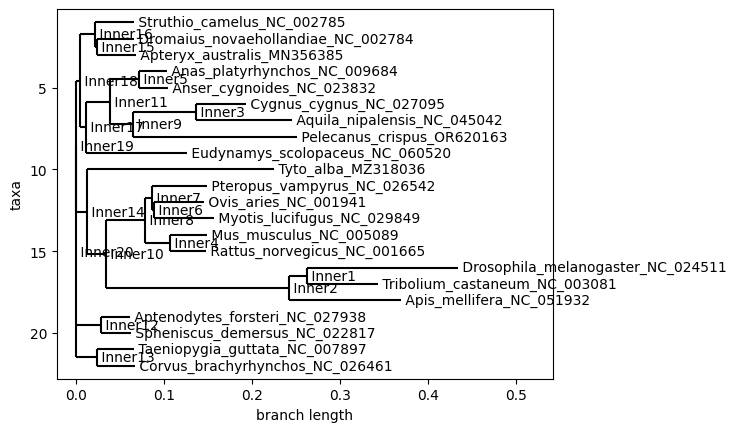

In [33]:
NJ_tree = construct_tree_NJ(alignment)
# TODO: Visualize and save the constructed trees
Phylo.draw(NJ_tree, do_show=False)
Phylo.write(NJ_tree, 'tree_output.xml', 'phyloxml')

In [ ]:
!modeltest-ng -i aligned.fasta -d aa

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
                             _      _ _            _      _   _  _____ 
                            | |    | | |          | |    | \ | |/ ____|
         _ __ ___   ___   __| | ___| | |_ ___  ___| |_   |  \| | |  __ 
        | '_ ` _ \ / _ \ / _` |/ _ \ | __/ _ \/ __| __|  | . ` | | |_ |
        | | | | | | (_) | (_| |  __/ | ||  __/\__ \ |_   | |\  | |__| |
        |_| |_| |_|\___/ \__,_|\___|_|\__\___||___/\__|  |_| \_|\_____|
--------------------------------------------------------------------------------
modeltest x.y.z
Copyright (C) 2017 Diego Darriba, David Posada, Alexandros Stamatakis
License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>.
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.

Written by Diego Darriba.
----------------------------------------------------------------------------

In [ ]:
!raxml-ng --msa aligned.fasta --model LG+G4 --prefix T1 --threads 2

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)

RAxML-NG v. 0.9.0 released on 20.05.2019 by The Exelixis Lab.
Developed by: Alexey M. Kozlov and Alexandros Stamatakis.
Contributors: Diego Darriba, Tomas Flouri, Benoit Morel, Sarah Lutteropp, Ben Bettisworth.
Latest version: https://github.com/amkozlov/raxml-ng
Questions/problems/suggestions? Please visit: https://groups.google.com/forum/#!forum/raxml

RAxML-NG was called at 04-Feb-2024 06:53:48 as follows:

raxml-ng --msa aligned.fasta --model LG+G4 --prefix T1 --threads 2

Analysis options:
  run mode: ML tree search
  start tree(s): random (10) + parsimony (10)
  random seed: 1707029628
  tip-inner: OFF
  pattern compression: ON
  per-rate scalers: OFF
  site repeats: ON
  fast spr radius: AUTO
  spr subtree cutoff: 1.000000
  branch lengths: proportional (ML estimate, algorithm: NR-FAST)
  SIMD kernels: AVX2
  parallelization: PTHREADS (2 threads), thread pinning: OFF

[00:00:00] Re

1

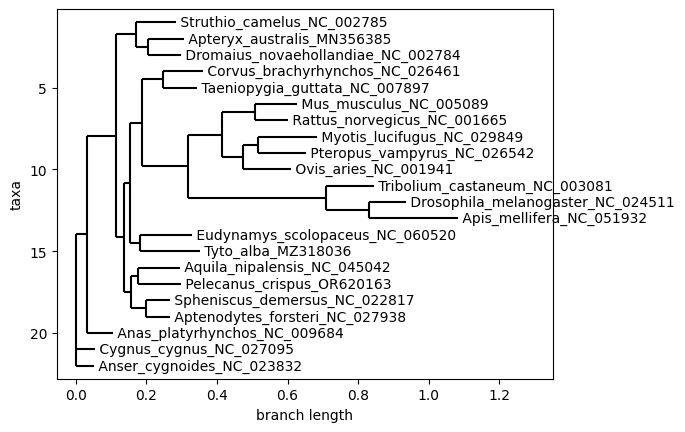

In [35]:
ML_tree = construct_tree_ML(alignment)
# TODO: Visualize and save the constructed trees
Phylo.draw(ML_tree, do_show=False)
Phylo.write(ML_tree, 'tree_output_ML.xml', 'phyloxml')

### Step 6: In-Depth Phylogenetic Tree Visualization

Having constructed phylogenetic trees using different methods, our next task is to visualize these trees effectively. This step is crucial for interpreting the results and communicating our findings.

#### Visualization Tools:

1. **FigTree**:
    - **Overview**: FigTree is designed for the graphical representation of phylogenetic trees. It's excellent for creating publication-ready visualizations.
    - **Resource**: [FigTree Tool](http://tree.bio.ed.ac.uk/software/figtree/)
    - **Usage**: Use FigTree to add detailed annotations, adjust branch colors, and format tree layouts for clear, interpretable visualizations.

2. **iTOL (Interactive Tree Of Life)**:
    - **Overview**: iTOL is a web-based tool for the display, annotation, and management of phylogenetic trees, offering extensive customization options.
    - **Resource**: [iTOL Website](https://itol.embl.de/)
    - **Usage**: Ideal for interactive tree visualizations. It allows users to explore different layers of data through their tree, such as adding charts or color-coding branches.

3. **Dendroscope**:
    - **Overview**: Dendroscope is a software program for viewing and editing phylogenetic trees, particularly useful for large datasets.
    - **Resource**: [Dendroscope Download](https://uni-tuebingen.de/fakultaeten/mathematisch-naturwissenschaftliche-fakultaet/fachbereiche/informatik/lehrstuehle/algorithms-in-bioinformatics/software/dendroscope/)
    - **Usage**: Utilize Dendroscope when dealing with large and complex trees or when you need to compare multiple trees side-by-side.

#### Task:

- **Visualize Each Tree**: Use one or more of the above tools to visualize the phylogenetic trees you constructed using Bayesian inference, maximum likelihood, and neighbor-joining methods.
- **Highlight Differences**: Focus on highlighting the differences and similarities between the trees obtained from the different methods. Pay attention to tree topology, branch lengths, and any notable patterns.
- **Interpretation and Presentation**: Aim for visualizations that are not only accurate but also interpretable and visually appealing. This will enhance the clarity of your work.

In [47]:
!pip install https://github.com/etetoolkit/ete/archive/ete4.zip

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     / 4.3 MB 15.7 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 56.3 MB/s eta 0:00:00
  Created wheel for ete4: filename=ete4-4.0.0b2-cp310-cp310-linux_x86_64.whl size=3148102 sha256=094f1b46f6ebdd73daa7fb454cf43b31c399fdb619e61bfd00c8ba9759ef6b00
  Stored in directory: /tmp/pip-ephem-wheel-cache-kymzj2u3/wheels/89/21/61/80025b2b6138108e4f3ee405a77c230502321e3e0a470f8492
Successfully built ete4


In [48]:
from ete3 import PhyloTree, TreeStyle

# Load the trees
NJ_tree = PhyloTree('tree_output.xml', format=0)  # Assuming format=0 for Newick format
ML_tree = PhyloTree('tree_output_ML.xml', format=0)

# Visualize NJ_tree
ts_NJ = TreeStyle()
ts_NJ.show_branch_length = True
ts_NJ.title.add_face(TextFace("NJ Tree"), column=0)
NJ_tree.render('NJ_tree.png', tree_style=ts_NJ)

# Visualize ML_tree
ts_ML = TreeStyle()
ts_ML.show_branch_length = True
ts_ML.title.add_face(TextFace("ML Tree"), column=0)
ML_tree.render('ML_tree.png', tree_style=ts_ML)


ImportError: cannot import name 'TreeStyle' from 'ete4' (/usr/local/lib/python3.10/site-packages/ete4/__init__.py)

### Cross-Disciplinary Applications (Optional)

This is an optional part with bonus, relative to the depth of your analysis. Refer to the first part of this notebook. You have complete freedom to do this part anyway you like, but to gain a portion of the bonus score for this section, a bare minimum effort is required.

### Conclusion and Reflective Insights

As we conclude our exploration of phylogenetic tree construction and analysis, let's reflect on the insights learned from this task and consider questions that emerge from our findings.

#### Interpretation of Results:

- Reflect on the phylogenetic trees produced by each method (Bayesian inference, maximum likelihood, and neighbor-joining). Consider how the differences in tree topology might offer varied perspectives on the evolutionary relationships among the species.

#### Questions to Ponder:

1. **Species Divergence**: Based on the trees, which species appear to have the most ancient divergence? How might this information contribute to our understanding of their evolutionary history?
   
2. **Common Ancestors**: Are there any unexpected pairings or groupings of species that suggest a closer evolutionary relationship than previously thought? How could this reshape our understanding of these species' evolutionary paths?

3. **Methodology Insights**: Considering the discrepancies between the trees generated by different methods, what might this tell us about the limitations and strengths of each phylogenetic analysis method?

4. **Conservation Implications**: Considering the evolutionary relationships revealed in your phylogenetic analysis, what insights can be gained for conservation strategies? Specifically, how could understanding the close evolutionary ties between species, which might be facing distinct environmental challenges, guide targeted conservation efforts?

<blockquote style="font-family:Arial; color:red; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>Don't forget to answer these questions!</strong>
</blockquote>
